In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = '../data'

In [2]:
df = pd.read_csv(data_dir + '/pd_speech_features.csv')
display(df)
print(df.shape)
y = df['class']

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


(756, 755)


In [3]:
# find all the columns which are full of zeros and remove them

zero_tol = 1e-5
zeros = (abs(df) <= zero_tol).all(axis=0)
zero_cols = [ii for ii, bb in enumerate(zeros) if bb]
print(f"\n---- there are {zero_cols} columns with all zeros ----\n")
print(len(zero_cols))
print(df.iloc[:, zero_cols[0]], '\n')

df = df.drop(df.columns[zero_cols], axis=1)
display(df)


---- there are [538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572] columns with all zeros ----

35
0     -2.890000e-21
1     -1.770000e-21
2      9.440000e-22
3     -4.480000e-21
4     -1.800000e-21
           ...     
751   -1.700000e-20
752    3.220000e-21
753   -2.950000e-22
754    1.770000e-21
755    1.460000e-20
Name: tqwt_meanValue_dec_1, Length: 756, dtype: float64 



,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
features = list(df.columns)
features.remove('id')
features.remove('class')

In [5]:
df_features = df[features]
pearson_all = df_features.corr(method='pearson')
display(pearson_all)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
gender,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,...,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828
PPE,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,...,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588
DFA,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,...,-0.199388,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699
RPDE,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,0.608966,...,-0.327460,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945
numPulses,-0.478367,0.191535,-0.286791,-0.521193,1.000000,0.999917,-0.897079,-0.187478,-0.426350,-0.516920,...,0.405103,0.268896,0.177255,0.043963,-0.024223,-0.036158,-0.047946,-0.068664,-0.069645,-0.062925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_32,0.089793,0.044163,-0.061845,-0.098923,-0.036158,-0.035954,0.035461,-0.092488,0.003916,0.014013,...,0.143156,0.283748,0.525901,0.768073,0.927854,1.000000,0.945107,0.729501,0.609663,0.467944
tqwt_kurtosisValue_dec_33,0.107618,0.045755,-0.033914,-0.097161,-0.047946,-0.047837,0.039487,-0.092429,0.018504,0.029028,...,0.084178,0.239203,0.486570,0.708646,0.841365,0.945107,1.000000,0.824620,0.698738,0.543845
tqwt_kurtosisValue_dec_34,0.128936,0.046175,0.043454,-0.036406,-0.068664,-0.068561,0.046140,-0.061721,0.027886,0.026556,...,0.017254,0.139668,0.383328,0.587449,0.667325,0.729501,0.824620,1.000000,0.948008,0.785141
tqwt_kurtosisValue_dec_35,0.107734,0.037385,0.067843,-0.018052,-0.069645,-0.069468,0.040828,-0.067636,0.010553,0.007976,...,-0.032719,0.054510,0.275390,0.477147,0.550686,0.609663,0.698738,0.948008,1.000000,0.866696


Text(0.5, 1.0, 'Abs(all Pearson correlations)')

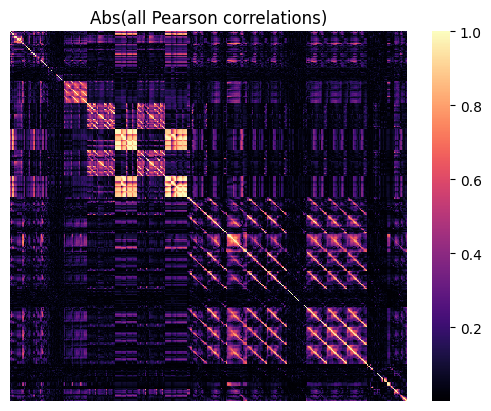

In [6]:
ax = sns.heatmap(pearson_all.abs(), cmap='magma', xticklabels=False, yticklabels=False)
ax.set_title("Abs(all Pearson correlations)")

In [7]:
# find all the features which correlate to each other, and drop them
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

high_corr_thresh = 0.5

# get the upper right triangle (not including diagonal)
upper_tri = pearson_all.where(np.triu(np.ones(pearson_all.shape), k=1).astype(bool))
display(upper_tri)

# find columns to drop
to_drop = [col for col in upper_tri.columns if any(abs(upper_tri[col]) > high_corr_thresh)]
print(to_drop)
print(f"\n---- number of features to drop due to high correlation = {len(to_drop)} ----\n")

# convert column names to indices and drop
to_drop_ind = [ii for ii in range(len(pearson_all.columns)) if pearson_all.columns[ii] in to_drop]
print(to_drop_ind)
print(f"\n---- number of features to drop due to high correlation = {len(to_drop_ind)} ----\n")
print(len(to_drop_ind)/df_features.shape[1])

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
gender,NaN,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,...,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828
PPE,NaN,NaN,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,...,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588
DFA,NaN,NaN,NaN,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,...,-0.199388,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699
RPDE,NaN,NaN,NaN,NaN,-0.521193,-0.524839,0.506707,0.333545,0.614340,0.608966,...,-0.327460,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945
numPulses,NaN,NaN,NaN,NaN,NaN,0.999917,-0.897079,-0.187478,-0.426350,-0.516920,...,0.405103,0.268896,0.177255,0.043963,-0.024223,-0.036158,-0.047946,-0.068664,-0.069645,-0.062925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.945107,0.729501,0.609663,0.467944
tqwt_kurtosisValue_dec_33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824620,0.698738,0.543845
tqwt_kurtosisValue_dec_34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948008,0.785141
tqwt_kurtosisValue_dec_35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866696


['numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f4', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_NSR_TKEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_4th_coef', 'mean_MFCC_9th_coef', 'mean_0th_delta', 'mean_delta_delta_0th', 'std_Log_energy', 'std_MFCC_0th_coef', 'std_MFCC_1st_coef', 'std_MFCC_3rd_coef', 'std_MFCC_4th_coef', 'std_MFCC_5th_coef', 'std_MFCC_6th_coef', 'std_MFCC_7th_coef', 'std_MFCC_8th_coef', 'std_MFCC_9th_coef', 'std_MFCC_10th_coef', 'std_MFCC_11th_coef', 'std_MFCC_12th_coef', 'std_delta_lo

In [8]:
# remove highly correlated features and SAVE the df

orig_num_features = df.shape[1]
df = df.drop(df.columns[to_drop_ind], axis=1)

display(df)
print(df.shape)
print(orig_num_features - len(to_drop))

,id,gender,PPE,DFA,meanPeriodPulses,meanHarmToNoiseHarmonicity,f2,f4,b1,b2,...,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.008064,18.995,1031.849040,3655.054806,101.092218,83.147440,...,-4.290000e-19,-9.660000e-18,-1.660000e-17,0.030756,8.0024,4.6068,2.1993,1.8314,18.9405,1
1,0,1,0.76686,0.69481,0.008258,21.497,1016.367294,3498.681572,58.465428,86.487292,...,-5.590000e-18,8.090000e-18,-6.280000e-18,-0.205900,116.5331,13.6965,1.9824,1.5783,45.1780,1
2,0,1,0.85083,0.67604,0.008340,17.651,1032.406341,3678.128717,160.387771,54.685168,...,2.460000e-18,1.120000e-16,-1.140000e-17,0.020236,6.8890,4.0864,2.1203,1.6731,4.7666,1
3,1,0,0.41121,0.79672,0.010858,19.865,1201.813897,4122.163933,238.667052,191.984916,...,4.244100e-03,9.940000e-05,-1.795500e-02,0.005381,46.6869,100.3649,2.5776,1.9491,4.0603,1
4,1,0,0.32790,0.79782,0.008162,19.557,1215.346469,4085.456839,402.216738,210.061394,...,7.456300e-04,4.850000e-05,5.015800e-02,-0.008074,14.2579,34.0835,2.2214,1.8157,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.004627,26.813,1395.398812,3285.426385,88.521045,80.283013,...,-1.750000e-05,2.161500e-02,4.155000e-02,-0.098989,5.2459,5.1805,2.3686,1.6785,6.8671,0
752,250,0,0.16084,0.56499,0.004550,17.802,1406.737344,3819.231665,31.238251,38.919082,...,-8.900000e-05,-6.823000e-03,4.173300e-01,-0.006295,5.8541,5.3809,4.8587,2.6391,28.4170,0
753,251,0,0.88389,0.72335,0.005069,24.005,1382.653498,3344.351359,250.727258,2566.530343,...,1.890000e-05,1.408400e-04,2.242100e-04,2.605600,4.0632,3.4505,2.6232,1.6263,5.0424,0
754,251,0,0.83782,0.74890,0.005679,19.706,1657.021811,3789.033261,148.537987,107.101663,...,9.009900e-04,7.250000e-05,2.497500e-03,0.614430,4.7000,3.7900,1.6265,1.5701,3.7131,0


(756, 126)
126


Text(0.5, 1.0, 'Abs(Pearson correlations \\ highly correlations)')

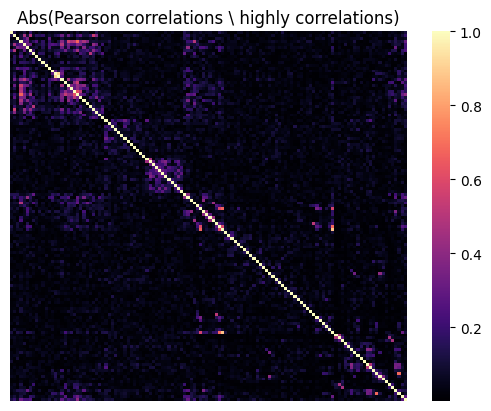

In [9]:
ax = sns.heatmap(df.corr(method='pearson').abs(), cmap='magma', xticklabels=False, yticklabels=False)
ax.set_title("Abs(Pearson corr \ highly corr)")

In [10]:
pearson = df.corr(method='pearson')['class']
print(pearson)
print(type(pearson))

id                          -0.111661
gender                       0.182713
PPE                         -0.072939
DFA                          0.306070
meanPeriodPulses             0.211368
                               ...   
tqwt_kurtosisValue_dec_11    0.045505
tqwt_kurtosisValue_dec_22    0.122207
tqwt_kurtosisValue_dec_24   -0.072244
tqwt_kurtosisValue_dec_36    0.279827
class                        1.000000
Name: class, Length: 126, dtype: float64
<class 'pandas.core.series.Series'>


In [11]:
# low_corr_cutoff = 0.003  # 80, 89, 84, 86 [log regr - accuracy, precision, recall, f1]
# low_corr_cutoff = 0.01   # 81, 90, 84, 87
low_corr_cutoff = 0.03   # 81, 89, 85, 87
# low_corr_cutoff = 0.1    # 82, 92, 83, 87 (slow)
# low_corr_cutoff = 0.2    # 82, 91, 83, 87 (slow)
# low_corr_cutoff = 0.25   # 78, 90, 79, 84 (slow)
# low_corr_cutoff = 0.3    # 75, 88, 78, 83

omit_these_features = pearson[abs(pearson) <= low_corr_cutoff].index
omit_these_features = list(omit_these_features)
# omit_these_features.remove('id')
print(omit_these_features, '\n')
print(len(omit_these_features), len(omit_these_features)/(df.shape[1] - 2))

['f4', 'b1', 'b2', 'mean_MFCC_12th_coef', 'mean_3rd_delta', 'mean_6th_delta', 'mean_7th_delta', 'mean_8th_delta', 'mean_9th_delta', 'mean_10th_delta', 'mean_11th_delta', 'mean_12th_delta', 'mean_delta_delta_0th', 'mean_1st_delta_delta', 'mean_2nd_delta_delta', 'mean_3rd_delta_delta', 'mean_5th_delta_delta', 'mean_6th_delta_delta', 'mean_7th_delta_delta', 'mean_8th_delta_delta', 'mean_9th_delta_delta', 'tqwt_energy_dec_30', 'tqwt_entropy_shannon_dec_25', 'tqwt_medianValue_dec_3', 'tqwt_medianValue_dec_4', 'tqwt_medianValue_dec_11', 'tqwt_medianValue_dec_14', 'tqwt_medianValue_dec_16', 'tqwt_medianValue_dec_17', 'tqwt_medianValue_dec_18', 'tqwt_medianValue_dec_19', 'tqwt_medianValue_dec_20', 'tqwt_medianValue_dec_21', 'tqwt_medianValue_dec_23', 'tqwt_medianValue_dec_24', 'tqwt_medianValue_dec_27', 'tqwt_medianValue_dec_28', 'tqwt_medianValue_dec_30', 'tqwt_skewnessValue_dec_2', 'tqwt_skewnessValue_dec_12', 'tqwt_skewnessValue_dec_14', 'tqwt_skewnessValue_dec_16', 'tqwt_skewnessValue_dec_

I will remove features which have a "(very) low" correlation with the class. A weak correlation is generally considered to be less than 0.3, but if I set corr_cutoff to 0.3 I lose 704 of the 753 features. So, through some trial and error, I set an appropriate corr_cutoff.

In [12]:
features = list(df.columns)
features.remove('id')
features.remove('class')

remaining_features = features.copy()
for ff in omit_these_features:
#     print(ff)
    remaining_features.remove(ff)
print(len(remaining_features))

78


In [13]:
# reduce and SAVE the df

df = df[['id'] + remaining_features + ['class']]
display(df)
df.to_csv(data_dir + '/pd_speech_features_reduced.csv', index=None)

,id,gender,PPE,DFA,meanPeriodPulses,meanHarmToNoiseHarmonicity,f2,b3,b4,GQ_prc5_95,...,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.008064,18.995,1031.849040,255.214830,396.643631,0.77778,...,-4.290000e-19,-9.660000e-18,-1.660000e-17,0.030756,8.0024,4.6068,2.1993,1.8314,18.9405,1
1,0,1,0.76686,0.69481,0.008258,21.497,1016.367294,248.357127,218.229722,0.81250,...,-5.590000e-18,8.090000e-18,-6.280000e-18,-0.205900,116.5331,13.6965,1.9824,1.5783,45.1780,1
2,0,1,0.85083,0.67604,0.008340,17.651,1032.406341,151.694847,84.240339,0.81818,...,2.460000e-18,1.120000e-16,-1.140000e-17,0.020236,6.8890,4.0864,2.1203,1.6731,4.7666,1
3,1,0,0.41121,0.79672,0.010858,19.865,1201.813897,573.752909,526.147599,0.98548,...,4.244100e-03,9.940000e-05,-1.795500e-02,0.005381,46.6869,100.3649,2.5776,1.9491,4.0603,1
4,1,0,0.32790,0.79782,0.008162,19.557,1215.346469,203.637106,384.611697,0.97847,...,7.456300e-04,4.850000e-05,5.015800e-02,-0.008074,14.2579,34.0835,2.2214,1.8157,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.004627,26.813,1395.398812,836.862497,2954.030296,1.00000,...,-1.750000e-05,2.161500e-02,4.155000e-02,-0.098989,5.2459,5.1805,2.3686,1.6785,6.8671,0
752,250,0,0.16084,0.56499,0.004550,17.802,1406.737344,5913.036193,472.403606,1.00000,...,-8.900000e-05,-6.823000e-03,4.173300e-01,-0.006295,5.8541,5.3809,4.8587,2.6391,28.4170,0
753,251,0,0.88389,0.72335,0.005069,24.005,1382.653498,149.117330,232.686866,1.00000,...,1.890000e-05,1.408400e-04,2.242100e-04,2.605600,4.0632,3.4505,2.6232,1.6263,5.0424,0
754,251,0,0.83782,0.74890,0.005679,19.706,1657.021811,194.220698,339.805353,1.00000,...,9.009900e-04,7.250000e-05,2.497500e-03,0.614430,4.7000,3.7900,1.6265,1.5701,3.7131,0


Text(0.5, 1.0, 'Abs(Pearson corr \\ highly corr \\ low-class corr)')

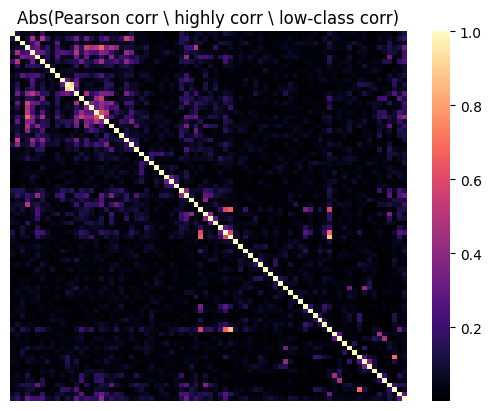

In [15]:
ax = sns.heatmap(df.corr(method='pearson').abs(), cmap='magma', xticklabels=False, yticklabels=False)
ax.set_title("Abs(Pearson corr \ highly corr \ low-class corr)")

I will now check the spearman correlation coefficient, which captures a sense of non-linear correlations, and then compare them to the pearson correlation coefficients.

In [16]:
spearman = df.corr(method='spearman')['class']
print(spearman)
print(type(spearman))

id                          -0.111661
gender                       0.182713
PPE                         -0.126365
DFA                          0.300818
meanPeriodPulses             0.258564
                               ...   
tqwt_kurtosisValue_dec_11    0.110157
tqwt_kurtosisValue_dec_22    0.174446
tqwt_kurtosisValue_dec_24    0.150844
tqwt_kurtosisValue_dec_36    0.281066
class                        1.000000
Name: class, Length: 80, dtype: float64
<class 'pandas.core.series.Series'>


In [17]:
high_corr_features = [ff for ff in remaining_features if abs(pearson[ff]) >= 0.3]
print(high_corr_features)
print(len(high_corr_features))

['DFA', 'mean_MFCC_2nd_coef', 'std_12th_delta_delta']
3


In [18]:
print("feature,    pearson,    spearman")
print("--------------------------------")
for ff in high_corr_features:
    print(f"{ff},    {pearson[ff]},    {spearman[ff]}")

feature,    pearson,    spearman
--------------------------------
DFA,    0.3060703713978527,    0.3008175650224533
mean_MFCC_2nd_coef,    0.39869532383637335,    0.367279101214638
std_12th_delta_delta,    0.3045158395771249,    0.317213663388093


We see that the following features have a non-linear correlation with the class (diff > 0.05): DFA, std_delta_delta_log_energy, tqwt_energy_dec_15, tqwt_entropy_shannon_dec_12, tqwt_kurtosisValue_dec_26, tqwt_kurtosisValue_dec_27.

And the following features are very linearily related to the class (diff < 0.005):
tqwt_entropy_shannon_dec_16, tqwt_entropy_shannon_dec_17, tqwt_stdValue_dec_12, **tqwt_minValue_dec_14**.

============================= I will now perform a PCA to check things out =============================

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
class RunPCA():
    def __init__(self, X: np.ndarray, y: pd.Series) -> None:
        self.X = X
        self.y = y
    
    def scale_X(self) -> None:
        sc = StandardScaler()
        self.X = sc.fit_transform(self.X)
    
    def exec_PCA(self) -> None:
        self.pca = PCA()
        self.X = self.pca.fit_transform(self.X)
    
    def set_ev(self) -> None:
        self.explained_variance = self.pca.explained_variance_ratio_
        self.num_components = len(self.explained_variance)
        print(f"number of components = {self.num_components}")
#         print(f"explained_variance = {self.explained_variance}")
        
        sum_cev = 0
        self.cummulative_ev = []
        for ii in range(self.num_components):
            sum_cev += self.explained_variance[ii]
            self.cummulative_ev.append(sum_cev)
#         print(f"cummulative_ev = {self.cummulative_ev}")
    
    def plot_ev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.explained_variance)
        plt.title('explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_cev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.cummulative_ev)
        plt.title('cummulative explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_PCA(self) -> None:        
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.title('PC1 vs PC2')
        plt.xlabel(f"PC1 = {100*self.explained_variance[0]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[1]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
        
        plt.figure()
        plt.scatter(self.X[:, 1], self.X[:, 2], c=self.y)
        plt.title('PC2 vs PC3')
        plt.xlabel(f"PC1 = {100*self.explained_variance[1]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[2]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
    
    def run(self) -> None:
        self.scale_X()
        self.exec_PCA()
        self.set_ev()
        self.plot_ev()
        self.plot_cev()
        self.plot_PCA()

In [31]:
X = df[remaining_features].values
old_X = X.copy()
print(X)

[[ 1.       0.85247  0.71826 ...  2.1993   1.8314  18.9405 ]
 [ 1.       0.76686  0.69481 ...  1.9824   1.5783  45.178  ]
 [ 1.       0.85083  0.67604 ...  2.1203   1.6731   4.7666 ]
 ...
 [ 0.       0.88389  0.72335 ...  2.6232   1.6263   5.0424 ]
 [ 0.       0.83782  0.7489  ...  1.6265   1.5701   3.7131 ]
 [ 0.       0.81304  0.76471 ...  1.6975   1.732    3.1527 ]]


[[ 1.       0.85247  0.71826 ...  2.1993   1.8314  18.9405 ]
 [ 1.       0.76686  0.69481 ...  1.9824   1.5783  45.178  ]
 [ 1.       0.85083  0.67604 ...  2.1203   1.6731   4.7666 ]
 ...
 [ 0.       0.88389  0.72335 ...  2.6232   1.6263   5.0424 ]
 [ 0.       0.83782  0.7489  ...  1.6265   1.5701   3.7131 ]
 [ 0.       0.81304  0.76471 ...  1.6975   1.732    3.1527 ]]
number of components = 78


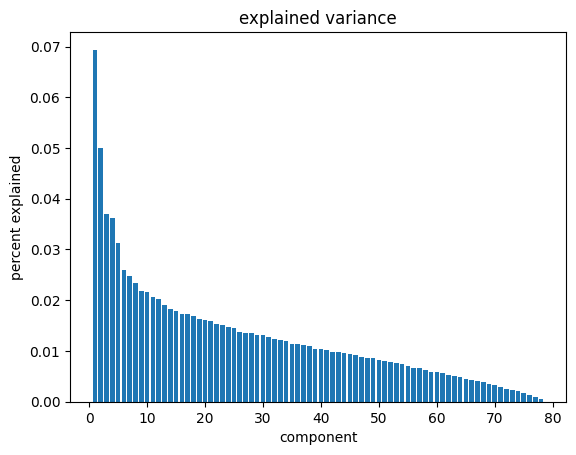

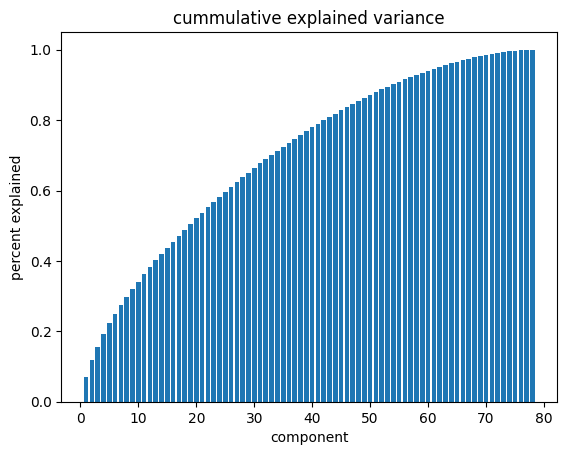

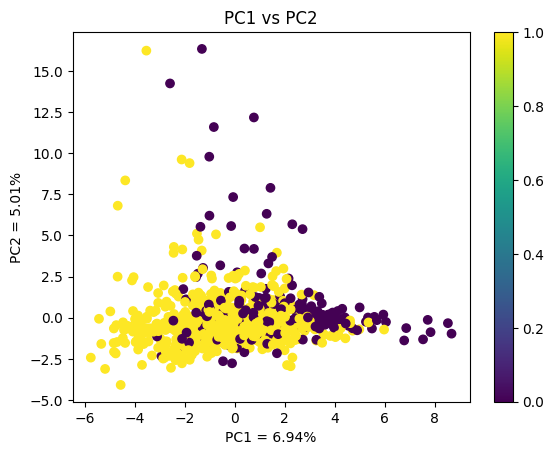

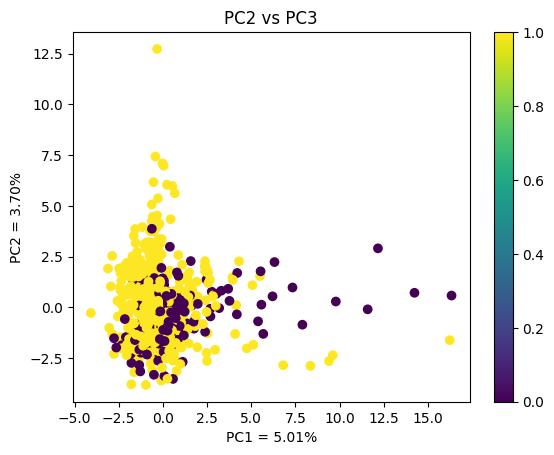

[[ 1.       0.85247  0.71826 ...  2.1993   1.8314  18.9405 ]
 [ 1.       0.76686  0.69481 ...  1.9824   1.5783  45.178  ]
 [ 1.       0.85083  0.67604 ...  2.1203   1.6731   4.7666 ]
 ...
 [ 0.       0.88389  0.72335 ...  2.6232   1.6263   5.0424 ]
 [ 0.       0.83782  0.7489  ...  1.6265   1.5701   3.7131 ]
 [ 0.       0.81304  0.76471 ...  1.6975   1.732    3.1527 ]]
True


,id,gender,PPE,DFA,meanPeriodPulses,meanHarmToNoiseHarmonicity,f2,b3,b4,GQ_prc5_95,...,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.008064,18.995,1031.849040,255.214830,396.643631,0.77778,...,-4.290000e-19,-9.660000e-18,-1.660000e-17,0.030756,8.0024,4.6068,2.1993,1.8314,18.9405,1
1,0,1,0.76686,0.69481,0.008258,21.497,1016.367294,248.357127,218.229722,0.81250,...,-5.590000e-18,8.090000e-18,-6.280000e-18,-0.205900,116.5331,13.6965,1.9824,1.5783,45.1780,1
2,0,1,0.85083,0.67604,0.008340,17.651,1032.406341,151.694847,84.240339,0.81818,...,2.460000e-18,1.120000e-16,-1.140000e-17,0.020236,6.8890,4.0864,2.1203,1.6731,4.7666,1
3,1,0,0.41121,0.79672,0.010858,19.865,1201.813897,573.752909,526.147599,0.98548,...,4.244100e-03,9.940000e-05,-1.795500e-02,0.005381,46.6869,100.3649,2.5776,1.9491,4.0603,1
4,1,0,0.32790,0.79782,0.008162,19.557,1215.346469,203.637106,384.611697,0.97847,...,7.456300e-04,4.850000e-05,5.015800e-02,-0.008074,14.2579,34.0835,2.2214,1.8157,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.004627,26.813,1395.398812,836.862497,2954.030296,1.00000,...,-1.750000e-05,2.161500e-02,4.155000e-02,-0.098989,5.2459,5.1805,2.3686,1.6785,6.8671,0
752,250,0,0.16084,0.56499,0.004550,17.802,1406.737344,5913.036193,472.403606,1.00000,...,-8.900000e-05,-6.823000e-03,4.173300e-01,-0.006295,5.8541,5.3809,4.8587,2.6391,28.4170,0
753,251,0,0.88389,0.72335,0.005069,24.005,1382.653498,149.117330,232.686866,1.00000,...,1.890000e-05,1.408400e-04,2.242100e-04,2.605600,4.0632,3.4505,2.6232,1.6263,5.0424,0
754,251,0,0.83782,0.74890,0.005679,19.706,1657.021811,194.220698,339.805353,1.00000,...,9.009900e-04,7.250000e-05,2.497500e-03,0.614430,4.7000,3.7900,1.6265,1.5701,3.7131,0


[[-1.55230918 -0.94128613 -2.31271658 ... -0.20418583  0.20473592
   0.33754878]
 [-1.77602401 -1.20092639 -1.6535581  ...  0.07877617  0.04802472
   0.12173545]
 [-1.71045493 -0.89571748 -1.13822368 ...  0.16889996  0.06538948
  -0.14356204]
 ...
 [ 1.20303876  1.18615367  0.19524532 ... -0.52789844 -0.2298113
  -0.00886609]
 [ 0.18154809  1.03584512  0.29730101 ... -0.38026369 -0.30889316
   0.08300475]
 [ 0.17105615  0.85439836 -0.15764935 ... -0.13455871  0.11715538
   0.18023572]]


In [21]:
rpca = RunPCA(X, y)
rpca.run()

print(X)
print((X == old_X).all())
display(df)

X_pca = rpca.X
print(X_pca)


# NOTE: from running below alone, I learnt that X cannot have all zero columns and highly correlated columns
# X = np.random.rand(10, 6)
# # X = np.concatenate([X, np.array([0,0,0,0,0,0,0,0,0,0]).reshape(-1, 1)], axis=1)
# X = np.concatenate([X, 10*X[:, 2].reshape(-1, 1)], axis=1)
# print(X)
# H = X@np.linalg.pinv(X.T@X)@X.T
# Hii = np.diag(H)
# print(2*X.shape[1]/X.shape[0])
# print(2*Hii.mean())

In PC1 vs PC2 we can see a separation of the classes, which is hopeful!

============================= I will now run a UMAP embedding to check things out =============================

In [22]:
import umap

/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.

In [23]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)  # run UMAP on the original X, not the X_pca

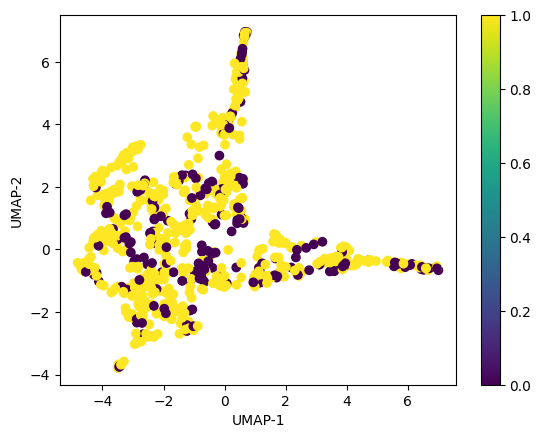

In [24]:
plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

============================= I will now find and remove some outliers =============================

I will remove outliers based on high "leverage" - which is the deviation of the sample in the feature space compared to the general clustering of the samples. They can be calculated via $H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$ for the i-th sample, and "high" happens for $H_{ii} > 2\bar{H_{ii}} = 2p/n$.

"leverage" $H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$,          $H_{ii} > 2\bar{H_{ii}} = 2p/n^*$

In [32]:
# X = X_pca.copy()

print(X)
print(X.shape)
H = X@np.linalg.pinv(X.T@X)@X.T
print(H.shape)
Hii = np.diag(H)
print(len(Hii))

[[ 1.       0.85247  0.71826 ...  2.1993   1.8314  18.9405 ]
 [ 1.       0.76686  0.69481 ...  1.9824   1.5783  45.178  ]
 [ 1.       0.85083  0.67604 ...  2.1203   1.6731   4.7666 ]
 ...
 [ 0.       0.88389  0.72335 ...  2.6232   1.6263   5.0424 ]
 [ 0.       0.83782  0.7489  ...  1.6265   1.5701   3.7131 ]
 [ 0.       0.81304  0.76471 ...  1.6975   1.732    3.1527 ]]
(756, 78)
(756, 756)
756


In [33]:
out_thresh = 2*X.shape[1]/X.shape[0]
print(f"the threshold for high is: 2p/n = 2*{X.shape[1]}/{X.shape[0]} = {out_thresh} == {2*Hii.mean()} = 2*mean(H_ii)")

the threshold for high is: 2p/n = 2*78/756 = 0.20634920634920634 == 0.19064415952170852 = 2*mean(H_ii)


Note that in the above cell, if I don't use X_pca (ie, I note out 'X = X_pca.copy()' two cells above) and I just use the original X, then $2p/n != 2*\bar(H_{ii})$ and I can't figure out why. I figured out that X cannot have all zero columns, and it cannot have highly correlated columns, but even removing those doesn't help. I'm lost! So, for now, we'lljust reassign via the PCA and hope that 

In [34]:
for ii in range(len(Hii)):
    print(ii, Hii[ii])

0 0.035703756434905864
1 0.032489796029621446
2 0.03753518793714376
3 0.07292355531231795
4 0.0836700567768864
5 0.0756138288403091
6 0.10043751532168689
7 0.06960105616624654
8 0.06158680090726913
9 0.03724538580917242
10 0.07334821084650658
11 0.03828380449272726
12 0.08949320933062208
13 0.06138117390485936
14 0.06352123468571479
15 0.0777341726333594
16 0.04872140709564685
17 0.04869541835833863
18 0.04203860618625013
19 0.06949056747765416
20 0.07268899932386623
21 0.06397668459921295
22 0.06927031626183108
23 0.06485079622371308
24 0.05429581217124026
25 0.0975007017911364
26 0.049640283977072874
27 0.05074910552583635
28 0.15420525226677395
29 0.042013117752244
30 0.09883412468127199
31 0.13491860415351972
32 0.09965322373716211
33 0.05108009895482421
34 0.0672718417859948
35 0.13595614682496782
36 0.0804783855588361
37 0.04562940550980174
38 0.048282478092407245
39 0.07626932385708887
40 0.11303772570454713
41 0.08572678026381797
42 0.05112112588189848
43 0.04338115129954055
44

In [36]:
check = out_thresh
# check = 0.995

ind = list(np.where(Hii > check)[0])
print(type(ind))
print(ind)
print(len(ind), len(ind)/len(Hii))

<class 'list'>
[72, 102, 125, 131, 144, 145, 146, 155, 200, 205, 211, 232, 233, 236, 243, 245, 251, 269, 337, 385, 410, 412, 426, 449, 451, 452, 464, 468, 469, 470, 479, 504, 515, 534, 540, 541, 564, 565, 594, 595, 596, 600, 608, 641, 645, 663, 664, 724, 732, 733, 735, 738]
52 0.06878306878306878


There were no hits for the condition that $H_{ii} > 2\bar{H_{ii}} = 2p/n$, so I tweaked the threashold down to remove <~ 1% of the points, ie, the top 1% of the highest leverage points.

In [37]:
# remove outliers and SAVE the df

df_outrmv = df.drop(index=ind).copy()
display(df_outrmv)
df_outrmv.to_csv(data_dir + '/pd_speech_features_reduced_outrmv.csv', index=None)
y = df_outrmv['class']

,id,gender,PPE,DFA,meanPeriodPulses,meanHarmToNoiseHarmonicity,f2,b3,b4,GQ_prc5_95,...,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.008064,18.995,1031.849040,255.214830,396.643631,0.77778,...,-4.290000e-19,-9.660000e-18,-1.660000e-17,0.030756,8.0024,4.6068,2.1993,1.8314,18.9405,1
1,0,1,0.76686,0.69481,0.008258,21.497,1016.367294,248.357127,218.229722,0.81250,...,-5.590000e-18,8.090000e-18,-6.280000e-18,-0.205900,116.5331,13.6965,1.9824,1.5783,45.1780,1
2,0,1,0.85083,0.67604,0.008340,17.651,1032.406341,151.694847,84.240339,0.81818,...,2.460000e-18,1.120000e-16,-1.140000e-17,0.020236,6.8890,4.0864,2.1203,1.6731,4.7666,1
3,1,0,0.41121,0.79672,0.010858,19.865,1201.813897,573.752909,526.147599,0.98548,...,4.244100e-03,9.940000e-05,-1.795500e-02,0.005381,46.6869,100.3649,2.5776,1.9491,4.0603,1
4,1,0,0.32790,0.79782,0.008162,19.557,1215.346469,203.637106,384.611697,0.97847,...,7.456300e-04,4.850000e-05,5.015800e-02,-0.008074,14.2579,34.0835,2.2214,1.8157,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.004627,26.813,1395.398812,836.862497,2954.030296,1.00000,...,-1.750000e-05,2.161500e-02,4.155000e-02,-0.098989,5.2459,5.1805,2.3686,1.6785,6.8671,0
752,250,0,0.16084,0.56499,0.004550,17.802,1406.737344,5913.036193,472.403606,1.00000,...,-8.900000e-05,-6.823000e-03,4.173300e-01,-0.006295,5.8541,5.3809,4.8587,2.6391,28.4170,0
753,251,0,0.88389,0.72335,0.005069,24.005,1382.653498,149.117330,232.686866,1.00000,...,1.890000e-05,1.408400e-04,2.242100e-04,2.605600,4.0632,3.4505,2.6232,1.6263,5.0424,0
754,251,0,0.83782,0.74890,0.005679,19.706,1657.021811,194.220698,339.805353,1.00000,...,9.009900e-04,7.250000e-05,2.497500e-03,0.614430,4.7000,3.7900,1.6265,1.5701,3.7131,0


Now redo the PCA and UMAP to see what changed...

In [ ]:
X = df_outrmv.values.copy()  # if you don't add .copy() changing X will change df_outrmv [objects, you see]
print(X)
rpca = RunPCA(X, y)
rpca.run()

# X = rpca.X
# print(X)

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)

plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

============================= I will now balance the data for the neural net =============================

In [ ]:
df_HC = df_outrmv[df_outrmv['class'] == 0]
df_PD = df_outrmv[df_outrmv['class'] == 1]

print(f"original num of HC =", len(df_HC))
print(f"original num of PD =", len(df_PD))

df_balanced = pd.concat([df_outrmv, df_HC.sample(n=len(df_PD)-len(df_HC), replace=True)]).reset_index(drop=True)
display(df_balanced)

print(f"num of HC =", len(df_balanced[df_balanced['class'] == 0]))
print(f"num of PD =", len(df_balanced[df_balanced['class'] == 1]))

In [ ]:
# SAVE the df from above

df_balanced.to_csv(data_dir + '/pd_speech_features_reduced_outrmv_balanced.csv', index=None)

In [ ]:
# F- I-- N---